In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

# Wine Quality Prediction


In [2]:
wine <- read.csv("C:/Users/Lenovo/Downloads/Wine_quality.csv")

In [3]:
any(is.na(wine))

[1] TRUE

In [4]:
wine <- wine %>% drop_na()

In [5]:
nrow(wine)

[1] 6463

In [6]:
head(wine)

,type,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,white,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,white,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,white,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,white,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


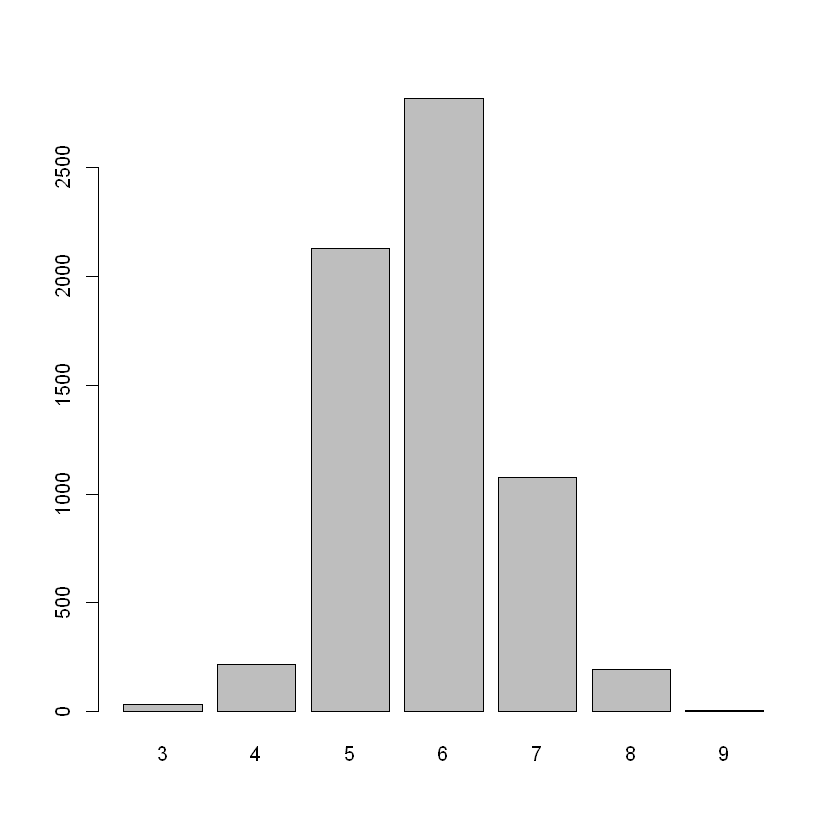

In [7]:
barplot(table(wine$quality))

In [8]:
table(wine$quality)


   3    4    5    6    7    8    9 
  30  214 2128 2820 1074  192    5 

In [9]:
wine$taste <- ifelse(wine$quality < 6,'bad','good')
wine$taste[wine$quality == 6] <- 'normal'
wine$taste <- as.factor(wine$taste)
table(wine$taste)


   bad   good normal 
  2372   1271   2820 

In [55]:
str(wine)

'data.frame':	6463 obs. of  14 variables:
 $ type                : Factor w/ 2 levels "red","white": 2 2 2 2 2 2 2 2 2 2 ...
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 

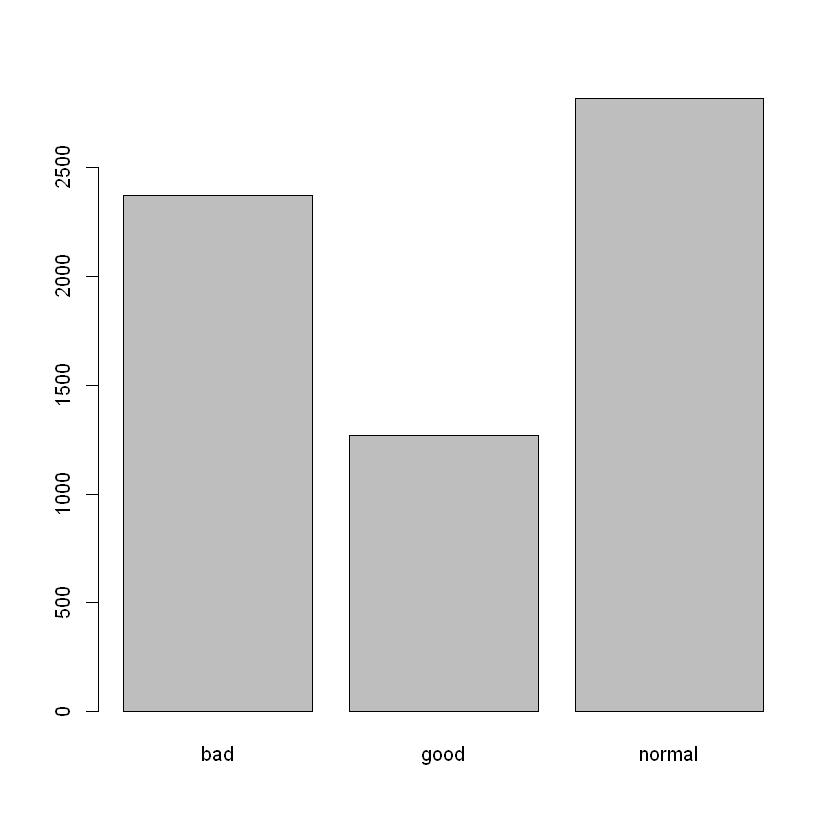

In [10]:
barplot(table(wine$taste))

In [11]:
# set.seed is use for making output of ramdom number is same and output never change if we run this command again and again
# (123) is a number that asaign to this process if i extract some number from this data set and i use set.seed(123) then output 
# will same

set.seed(123)

In [12]:
samp <- sample(nrow(wine), 0.6 * nrow(wine))

In [13]:
train <- wine[samp, ]
test <- wine[-samp, ]

In [14]:
#install.packages("randomForest")

In [15]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [16]:
model <- randomForest(taste ~ . - quality, data = train)

In [17]:
model


Call:
 randomForest(formula = taste ~ . - quality, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 30.33%
Confusion matrix:
        bad good normal class.error
bad    1016   19    378   0.2809625
good     25  435    296   0.4246032
normal  324  134   1250   0.2681499

In [18]:
pred <- predict(model, newdata = test)

In [19]:
table(pred, test$taste)

        
pred     bad good normal
  bad    701   12    194
  good     9  307     75
  normal 249  196    843

In [20]:
(702+307+845)/nrow(test)

[1] 0.7169374

## Accuracy of the model is 71%

<br><br>
# Adult income 

<hr>

In [94]:
adult <- read.csv("C:/Users/Lenovo/Downloads/adult-training.csv")
head(adult)

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hourse_per_week,native_country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [95]:
any(is.na(adult))

[1] FALSE

In [96]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age            : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass      : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt         : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education      : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ educational_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation     : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship   : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race           : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ gender         : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain   : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 

In [97]:
adult$workclass <- as.character(adult$workclass)

In [98]:
str(adult)

In [99]:
table(adult$workclass)


                ?       Federal-gov         Local-gov      Never-worked 
             1836               960              2093                 7 
          Private      Self-emp-inc  Self-emp-not-inc         State-gov 
            22696              1116              2541              1298 
      Without-pay 
               14 

In [100]:
adult$workclass[adult$workclass == 'Without-pay'] <- 'Unemployed'


Warning message in `[<-.factor`(`*tmp*`, adult$workclass == "Without-pay", value = "Unemployed"):
"invalid factor level, NA generated"


In [101]:
table(adult$workclass)


                ?       Federal-gov         Local-gov      Never-worked 
             1836               960              2093                 7 
          Private      Self-emp-inc  Self-emp-not-inc         State-gov 
            22696              1116              2541              1298 
      Without-pay 
               14 

In [66]:
table(adult$marital_status)


              Divorced      Married-AF-spouse     Married-civ-spouse 
                  4443                     23                  14976 
 Married-spouse-absent          Never-married              Separated 
                   418                  10683                   1025 
               Widowed 
                   993 

In [67]:
adult$marital_status <- as.character(adult$marital_status)

adult$marital_status[adult$marital_status == "Married-AF-spouse" | adult$marital_status == "Married-civ-spouse" |
                    adult$marital_status == " Married-spouse-absent"] <- "Married"
adult$marital_status[adult$marital_status == "Divorced" | adult$marital_status == "Widowed" |
                    adult$marital_status == "Separated"] <- "Not married"

table(adult$marital_status)


           Divorced   Married-AF-spouse  Married-civ-spouse       Never-married 
               4443                  23               14976               10683 
          Separated             Widowed             Married 
               1025                 993                 418 

## Model is incompleted

<hr>

<br><br>

# Breast Cancer dataset 

In [32]:
#this data not is in csv format this is in text format but i change it in csv format

cancerdf <- read.csv("C:/Users/Lenovo/Downloads/breast-cancer-wisconsin.data",stringsAsFactors = FALSE)

In [33]:
str(cancerdf)

'data.frame':	698 obs. of  11 variables:
 $ X1000025: int  1002945 1015425 1016277 1017023 1017122 1018099 1018561 1033078 1033078 1035283 ...
 $ X5      : int  5 3 6 4 8 1 2 2 4 1 ...
 $ X1      : int  4 1 8 1 10 1 1 1 2 1 ...
 $ X1.1    : int  4 1 8 1 10 1 2 1 1 1 ...
 $ X1.2    : int  5 1 1 3 8 1 1 1 1 1 ...
 $ X2      : int  7 2 3 2 7 2 2 2 2 1 ...
 $ X1.3    : chr  "10" "2" "4" "1" ...
 $ X3      : int  3 3 3 3 9 3 3 1 2 3 ...
 $ X1.4    : int  2 1 7 1 7 1 1 1 1 1 ...
 $ X1.5    : int  1 1 1 1 1 1 1 5 1 1 ...
 $ X2.1    : int  2 2 2 2 4 2 2 2 2 2 ...


In [34]:
names(cancerdf) <- c('id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',' Marginal Adhesion ',
                     'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class')

In [35]:
head(cancerdf)

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2


In [36]:
str(cancerdf)

'data.frame':	698 obs. of  11 variables:
 $ id                         : int  1002945 1015425 1016277 1017023 1017122 1018099 1018561 1033078 1033078 1035283 ...
 $ Clump Thickness            : int  5 3 6 4 8 1 2 2 4 1 ...
 $ Uniformity of Cell Size    : int  4 1 8 1 10 1 1 1 2 1 ...
 $ Uniformity of Cell Shape   : int  4 1 8 1 10 1 2 1 1 1 ...
 $  Marginal Adhesion         : int  5 1 1 3 8 1 1 1 1 1 ...
 $ Single Epithelial Cell Size: int  7 2 3 2 7 2 2 2 2 1 ...
 $ Bare Nuclei                : chr  "10" "2" "4" "1" ...
 $ Bland Chromatin            : int  3 3 3 3 9 3 3 1 2 3 ...
 $ Normal Nucleoli            : int  2 1 7 1 7 1 1 1 1 1 ...
 $ Mitoses                    : int  1 1 1 1 1 1 1 5 1 1 ...
 $ Class                      : int  2 2 2 2 4 2 2 2 2 2 ...


In [37]:
cancerdf$id <- NULL

In [38]:
str(cancerdf)

'data.frame':	698 obs. of  10 variables:
 $ Clump Thickness            : int  5 3 6 4 8 1 2 2 4 1 ...
 $ Uniformity of Cell Size    : int  4 1 8 1 10 1 1 1 2 1 ...
 $ Uniformity of Cell Shape   : int  4 1 8 1 10 1 2 1 1 1 ...
 $  Marginal Adhesion         : int  5 1 1 3 8 1 1 1 1 1 ...
 $ Single Epithelial Cell Size: int  7 2 3 2 7 2 2 2 2 1 ...
 $ Bare Nuclei                : chr  "10" "2" "4" "1" ...
 $ Bland Chromatin            : int  3 3 3 3 9 3 3 1 2 3 ...
 $ Normal Nucleoli            : int  2 1 7 1 7 1 1 1 1 1 ...
 $ Mitoses                    : int  1 1 1 1 1 1 1 5 1 1 ...
 $ Class                      : int  2 2 2 2 4 2 2 2 2 2 ...


In [39]:
cancerdf$`Bare Nuclei` <- as.numeric(cancerdf$`Bare Nuclei`)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [40]:
str(cancerdf)

'data.frame':	698 obs. of  10 variables:
 $ Clump Thickness            : int  5 3 6 4 8 1 2 2 4 1 ...
 $ Uniformity of Cell Size    : int  4 1 8 1 10 1 1 1 2 1 ...
 $ Uniformity of Cell Shape   : int  4 1 8 1 10 1 2 1 1 1 ...
 $  Marginal Adhesion         : int  5 1 1 3 8 1 1 1 1 1 ...
 $ Single Epithelial Cell Size: int  7 2 3 2 7 2 2 2 2 1 ...
 $ Bare Nuclei                : num  10 2 4 1 10 10 1 1 1 1 ...
 $ Bland Chromatin            : int  3 3 3 3 9 3 3 1 2 3 ...
 $ Normal Nucleoli            : int  2 1 7 1 7 1 1 1 1 1 ...
 $ Mitoses                    : int  1 1 1 1 1 1 1 5 1 1 ...
 $ Class                      : int  2 2 2 2 4 2 2 2 2 2 ...


In [43]:
#identify the rows without missing data

cancerdf <- cancerdf[complete.cases(cancerdf),]

In [44]:
str(cancerdf)

'data.frame':	682 obs. of  10 variables:
 $ Clump Thickness            : int  5 3 6 4 8 1 2 2 4 1 ...
 $ Uniformity of Cell Size    : int  4 1 8 1 10 1 1 1 2 1 ...
 $ Uniformity of Cell Shape   : int  4 1 8 1 10 1 2 1 1 1 ...
 $  Marginal Adhesion         : int  5 1 1 3 8 1 1 1 1 1 ...
 $ Single Epithelial Cell Size: int  7 2 3 2 7 2 2 2 2 1 ...
 $ Bare Nuclei                : num  10 2 4 1 10 10 1 1 1 1 ...
 $ Bland Chromatin            : int  3 3 3 3 9 3 3 1 2 3 ...
 $ Normal Nucleoli            : int  2 1 7 1 7 1 1 1 1 1 ...
 $ Mitoses                    : int  1 1 1 1 1 1 1 5 1 1 ...
 $ Class                      : int  2 2 2 2 4 2 2 2 2 2 ...


In [45]:
cancerdf$Class <- factor(ifelse(cancerdf$Class == 2, "benign", "malignant"))

In [47]:
head(cancerdf)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign
5,8,10,10,8,7,10,9,7,1,malignant
6,1,1,1,1,2,10,3,1,1,benign


In [52]:
# this is Data Splicing in very simple format

trainingSet = cancerdf[1:500, 1:9]
testSet = cancerdf[501:682, 1:9]

In [53]:
# split the diagnosis into training and test outcomes sets

trainingOutcomes <- cancerdf[1:500, 10]
testOutcomes <- cancerdf[501:682, 10]

In [56]:
sqrt(500)

[1] 22.36068

In [57]:
library(class)

In [58]:
predictions <- knn(train = trainingSet, cl = trainingOutcomes, k = 22, test = testSet)

In [59]:
predictions

[1] benign    benign    benign    malignant benign    benign    malignant
  [8] malignant benign    benign    benign    benign    benign    benign   
 [15] malignant benign    benign    benign    benign    benign    benign   
 [22] benign    benign    benign    benign    benign    benign    benign   
 [29] benign    benign    malignant benign    benign    malignant benign   
 [36] benign    benign    benign    benign    benign    benign    benign   
 [43] benign    benign    benign    benign    benign    benign    benign   
 [50] malignant benign    benign    malignant malignant malignant malignant
 [57] benign    benign    malignant benign    benign    benign    benign   
 [64] benign    benign    malignant malignant benign    benign    benign   
 [71] malignant benign    malignant benign    malignant malignant malignant
 [78] benign    malignant benign    benign    benign    benign    benign   
 [85] benign    benign    benign    malignant malignant malignant benign   
 [92] benign    malignant benign    malignant malignant malignant benign   
 [99] benign    benign    benign    benign    benign    benign    benign   
[106] benign    benign    benign    benign    malignant benign    benign   
[113] benign    benign    benign    benign    malignant benign    benign   
[120] malignant benign    benign    benign    benign    benign    benign   
[127] benign    benign    benign    benign    benign    malignant benign   
[134] benign    benign    benign    benign    benign    benign    benign   
[141] benign    malignant benign    benign    benign    benign    benign   
[148] benign    benign    benign    benign    malignant malignant malignant
[155] benign    benign    benign    benign    benign    benign    benign   
[162] benign    benign    malignant malignant benign    benign    benign   
[169] benign    benign    benign    benign    benign    benign    malignant
[176] benign    benign    benign    benign    malignant malignant malignant
Levels: benign malignant

In [61]:
table(testOutcomes, predictions)

            predictions
testOutcomes benign malignant
   benign       141         0
   malignant      0        41

In [62]:
actual_preds <- data.frame(cbind(actuals = testOutcomes, predicted = predictions))
correlation_accuracy <- cor(actual_preds)
head(actual_preds)

,actuals,predicted
,<int>,<int>
1,1,1
2,1,1
3,1,1
4,2,2
5,1,1
6,1,1


In [63]:
correlation_accuracy

,actuals,predicted
actuals,1,1
predicted,1,1


## Accuracy of the model is 100%